### Chi-Squared Tests

#### Observed And Expected

![title](./img/1_chisq.png)
![title](./img/2_chisq.png)

#### Calculating Differences

![title](./img/3_chisq.png)

In [5]:
# Compute the propotional difference

female_diff = (10771 - 16280.5) / 16280.5
male_diff = (21790 - 16280.5) / 16280.5

print('[female_diff] - ',female_diff, '[male_diff] - ',male_diff)

[female_diff] -  -0.33841098246368356 [male_diff] -  0.33841098246368356


#### Updating the Formula

![title](./img/5_chisq.png)
![title](./img/6_chisq.png)

In [6]:
female_diff = (10771 - 16280.5) ** 2 / 16280.5
male_diff = (21790 - 16280.5) ** 2 / 16280.5
gender_chisq = female_diff + male_diff
gender_chisq

3728.950615767329

#### Generating a Distribution

![title](./img/7_chisq.png)

(array([656., 164.,  93.,  35.,  24.,  12.,   6.,   7.,   2.,   1.]),
 array([3.07115875e-05, 9.05555726e-01, 1.81108074e+00, 2.71660576e+00,
        3.62213077e+00, 4.52765578e+00, 5.43318080e+00, 6.33870581e+00,
        7.24423083e+00, 8.14975584e+00, 9.05528086e+00]),
 <BarContainer object of 10 artists>)

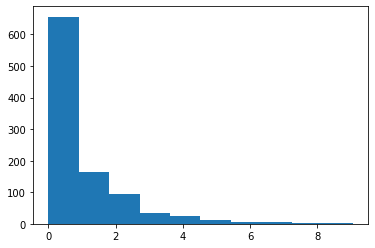

In [7]:
chi_squared_values = []
from numpy.random import random
import matplotlib.pyplot as plt

for i in range(1000):
    sequence = random((32561,))
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5
    female_diff = (female_count - 16280.5) ** 2 / 16280.5
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)

plt.hist(chi_squared_values)

#### Statistical Significance

our calculated chi-squared value is greater than all the values in the distribution, so our p-value is 0, indicating that our result is statistically significant. You may recall from the last mission that .05 is the typical threshold for statistical significance, and anything below it is considered significant.

A significant value indicates that there's a difference between the observed and expected values, but it doesn't indicate what is different.

Now that we have a chi-squared sampling distribution, we can compare the chi-squared value we calculated for our data to it to see if our result is statistically significant. The chi-squared value we calculated was 3728.95. The highest value in the chi-squared sampling distribution was about 12. This means that our chi-squared value is higher than 100% of all the values in the sampling distribution, so we get a p-value of 0. This means that there is a 0% chance that we could get such a result randomly.

This would indicate that we need to investigate our data collection techniques more closely to figure out why this result occurred.

Because a chi-squared value has no sign (all chi-squared values are positive), it doesn't tell us anything about the direction of the statistical significance. If we had 10771 Females, and 21790 Males, or 10771 Males, and 21790 Females, we'd get the same chi-squared value. It's important to look at the data and see how the data is unbalanced after calculating a chi-squared value and getting a significant result.

#### Smaller Samples

![title](./img/4_chisq.png)

In [8]:
female_diff = (107.71 - 162.805) ** 2 / 162.805
male_diff = (217.90 - 162.805) ** 2 / 162.805
gender_chisq = female_diff + male_diff
gender_chisq

37.2895061576733

#### Sampling Distribution Equality

![title](./img/8_chisq.png)
![title](./img/9_chisq.png)

(array([694., 171.,  53.,  47.,  20.,   4.,   6.,   4.,   0.,   1.]),
 array([0.   , 0.972, 1.944, 2.916, 3.888, 4.86 , 5.832, 6.804, 7.776,
        8.748, 9.72 ]),
 <BarContainer object of 10 artists>)

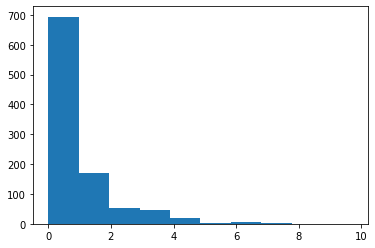

In [9]:
chi_squared_values = []
from numpy.random import random
import matplotlib.pyplot as plt

for i in range(1000):
    sequence = random((300,))
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 150) ** 2 / 150
    female_diff = (female_count - 150) ** 2 / 150
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)

plt.hist(chi_squared_values)

#### Degrees of Freedom

![title](./img/10_chisq.png)

#### Increasing Degrees of Freedom

![title](./img/11_chisq.png)
![title](./img/12_chisq.png)

In [1]:
diffs = []
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]

for i, obs in enumerate(observed):
    exp = expected[i]
    diff = (obs - exp) ** 2 / exp
    diffs.append(diff)
    
race_chisq = sum(diffs)
race_chisq

1080.485936593381

#### Using SciPy

![title](./img/13_chisq.png)

In [2]:
from scipy.stats import chisquare
import numpy as np
observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])

chisquare_value, race_pvalue = chisquare(observed, expected)

print('chisquare_value - ', chisquare_value, 'race_pvalue - ', race_pvalue)

chisquare_value -  1080.485936593381 race_pvalue -  1.2848494674873035e-232
